In [1]:
#pip install --upgrade pandas


this is a predictive model to predict the price of a mobile according to its features like

    1. product_id
    2. sale
    3. weight
    4. resolution
    5. ppi
    6. cpu core
    7. cpu frequency
    8. internal memory
    9. ram
    10. rear camera
    11. front camera
    12. battery
    13. thickness 

our target variable will be ***PRICE***.

the model uses 13 features to predict the price using a linear regression model.

the code contains some basic EDA and preprocessing steps where we compared our test variables to the target variable price to check linearity.

the dataset is taken from kaggle:
https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction/data

In [36]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
mobile = pd.read_csv(r"C:\\Users\\Muhammad Hassan\\Desktop\\Semester VI\\Artificial Intelligence Theory\\Project\\dataset\\Cellphone.csv")

In [38]:
mobile

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
0            16.0  3.000    13.00        8.0     2610        7.4  
1             4.0  1.000     3.15        0.0     1700        9.9  
2             8.0  1.500    13.00        5.0     2000        7.6  
3             4.0  0.512     3.15        0.0     1400       11.0  
4             4.0  1.000     3.15        0.0     1700        9.9  
..            ...    ...      ...        ...      ...        ...  
156         128.0  6.000    12.00       16.0     4080        8.4  
157         128.0  6.000    20.00        8.0     3400        7.9  
158          64.0  4.000    20.00       20.0     3000        6.8  
159         128.0  6.000    20.00        8.0     3400        7.9  
160          16.0  3.000    21.50       16.0     2700        8.4  

[161 rows x 14 columns]

In [39]:
mobile.shape

(161, 14)

In [40]:
mobile.describe()

Product_id        Price         Sale      weight  resoloution  \
count   161.000000   161.000000   161.000000  161.000000   161.000000   
mean    675.559006  2215.596273   621.465839  170.426087     5.209938   
std     410.851583   768.187171  1546.618517   92.888612     1.509953   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     237.000000  1734.000000    37.000000  134.100000     4.800000   
50%     774.000000  2258.000000   106.000000  153.000000     5.150000   
75%    1026.000000  2744.000000   382.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi    cpu core    cpu freq  internal mem         ram  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean   335.055901    4.857143    1.502832     24.501714    2.204994   
std    134.826659    2.444016    0.599783     28.804773    1.609831   
min    121.000000    0.000000    0.000000      0.000000    0.000000   
25%    233.000000    4.000000    1.200000      8.000000    1.000000   
50%    294.000000    4.000000    1.400000     16.000000    2.000000   
75%    428.000000    8.000000    1.875000     32.000000    3.000000   
max    806.000000    8.000000    2.700000    128.000000    6.000000   

          RearCam   Front_Cam      battery   thickness  
count  161.000000  161.000000   161.000000  161.000000  
mean    10.378261    4.503106  2842.111801    8.921739  
std      6.181585    4.342053  1366.990838    2.192564  
min      0.000000    0.000000   800.000000    5.100000  
25%      5.000000    0.000000  2040.000000    7.600000  
50%     12.000000    5.000000  2800.000000    8.400000  
75%     16.000000    8.000000  3240.000000    9.800000  
max     23.000000   20.000000  9500.000000   18.500000

In [41]:
mobile.info()
# no nan values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [42]:
mobile.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [43]:
mobile.tail()

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem  ram  RearCam  Front_Cam  battery  thickness  
156         128.0  6.0     12.0       16.0     4080        8.4  
157         128.0  6.0     20.0        8.0     3400        7.9  
158          64.0  4.0     20.0       20.0     3000        6.8  
159         128.0  6.0     20.0        8.0     3400        7.9  
160          16.0  3.0     21.5       16.0     2700        8.4

In [44]:
mobile.head()

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9

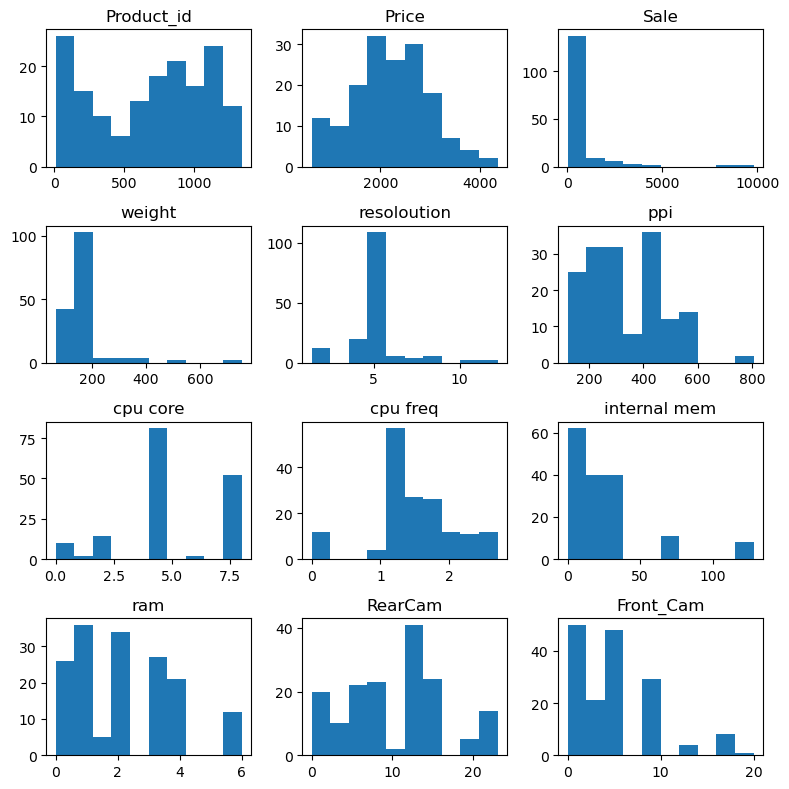

In [45]:
import matplotlib.pyplot as plt
import pandas as pd


fig, axs = plt.subplots(4, 3, figsize=(8, 8))


columns = mobile.columns
for i in range(4):
    for j in range(3):
        if (i * 3 + j) < len(columns):
            axs[i, j].hist(mobile[columns[i * 3 + j]], bins=10)
            axs[i, j].set_title(columns[i * 3 + j])
            axs[i, j].spines['top'].set_color('black') # Add black outline
            axs[i, j].spines['bottom'].set_color('black') # Add black outline
            axs[i, j].spines['left'].set_color('black') # Add black outline
            axs[i, j].spines['right'].set_color('black') # Add black outline

plt.tight_layout()
plt.show()


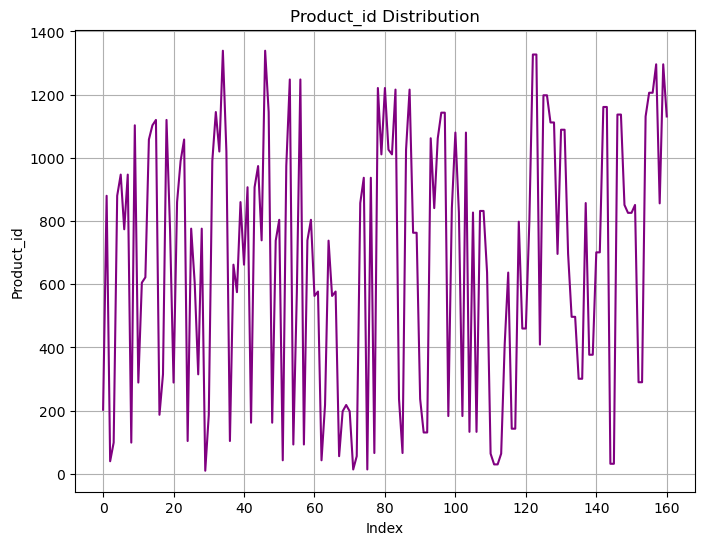

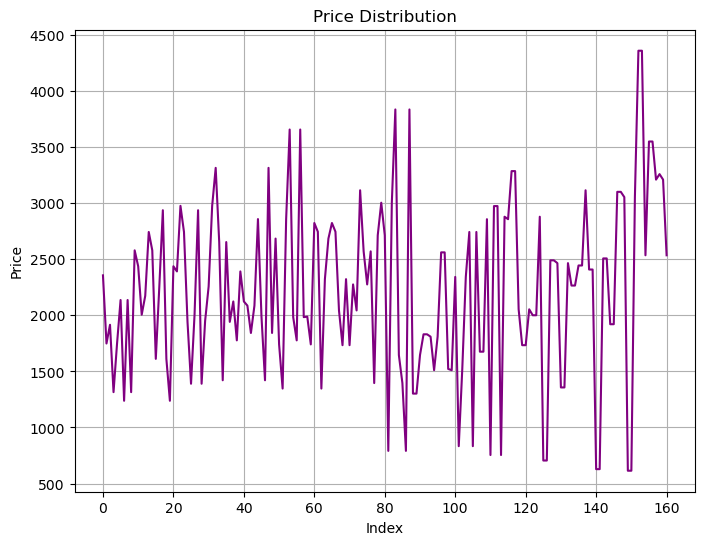

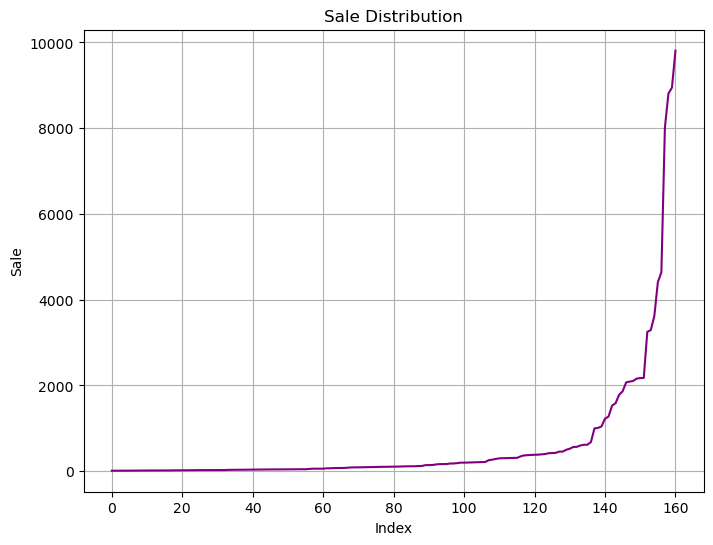

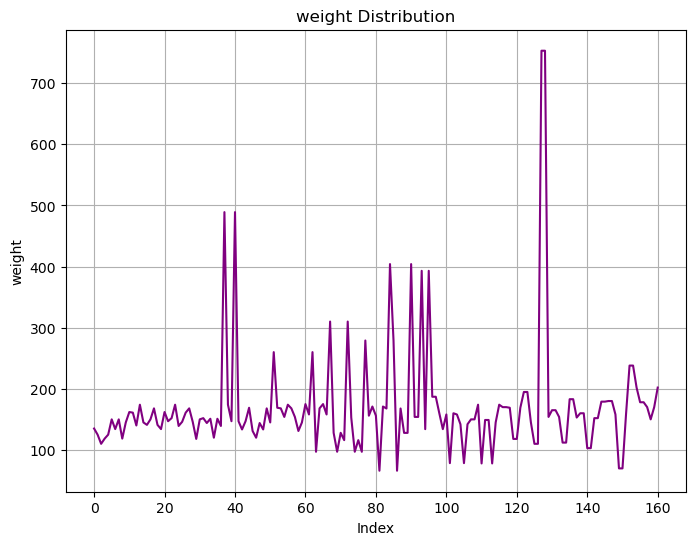

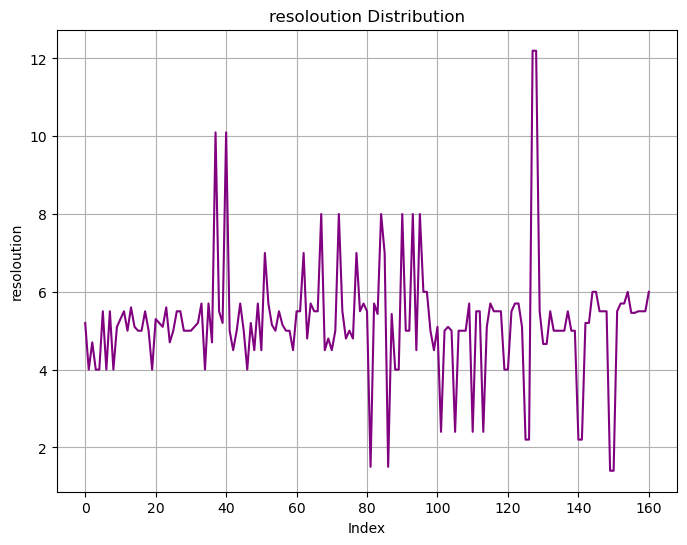

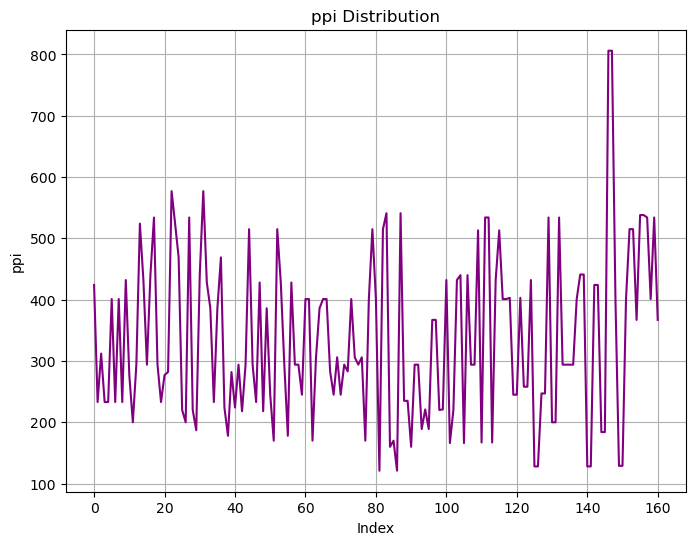

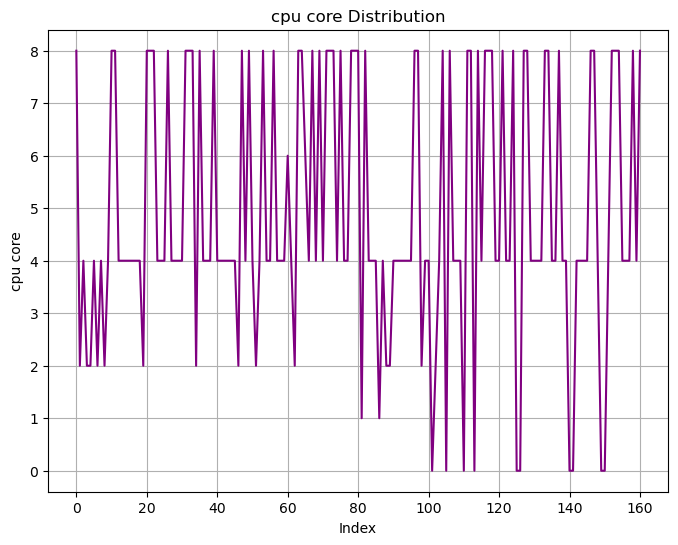

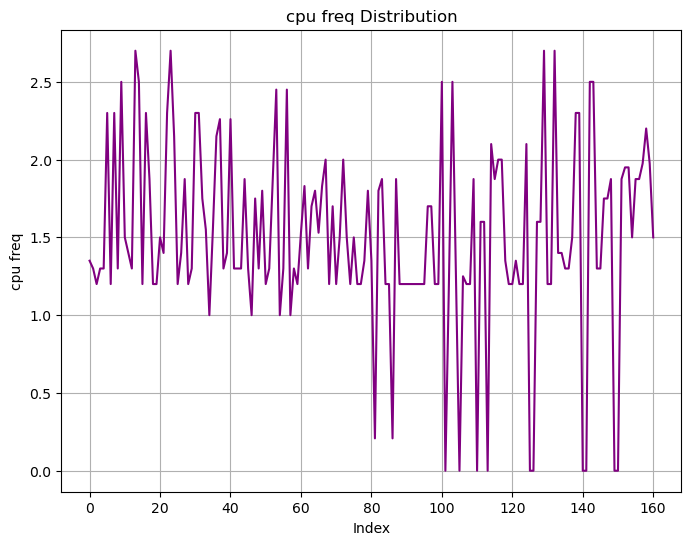

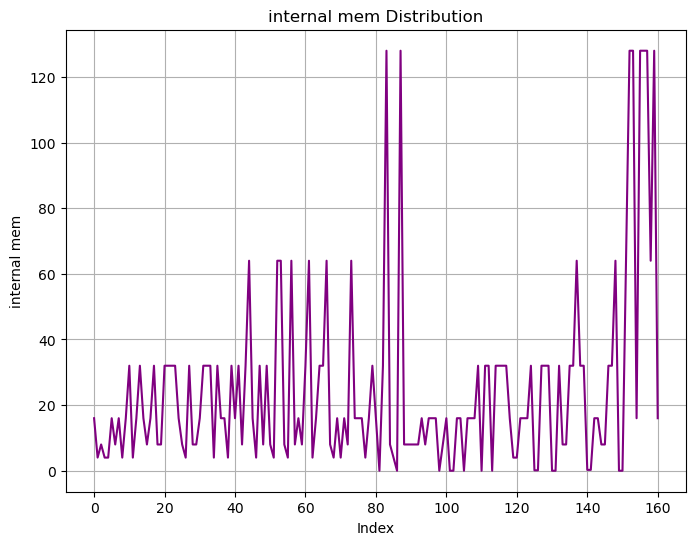

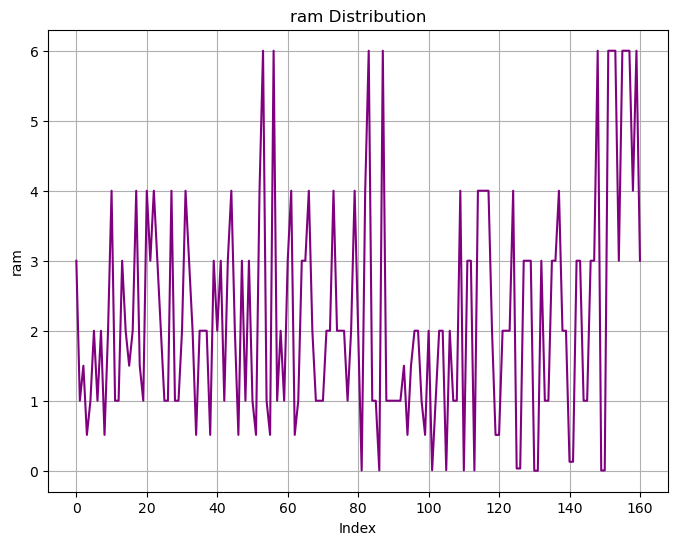

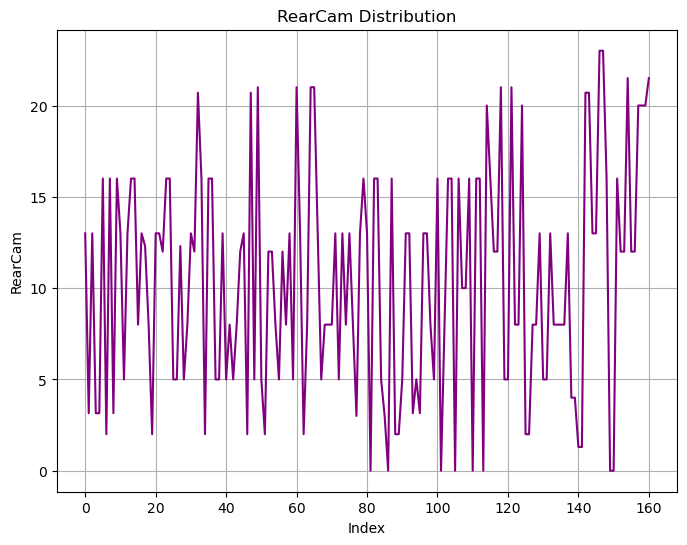

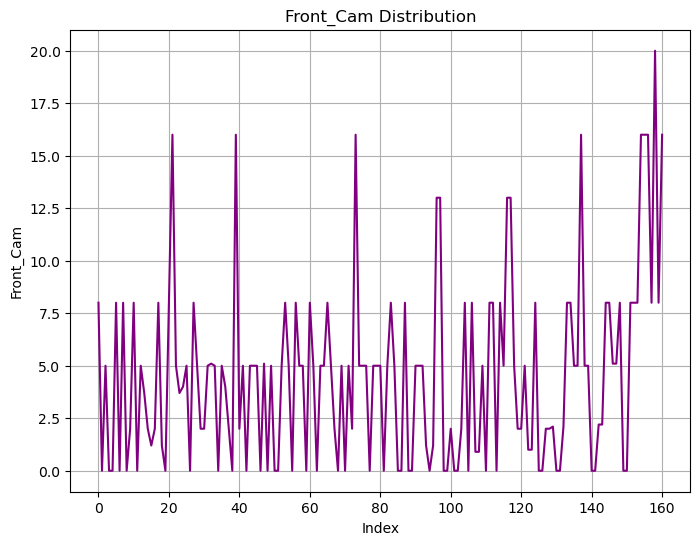

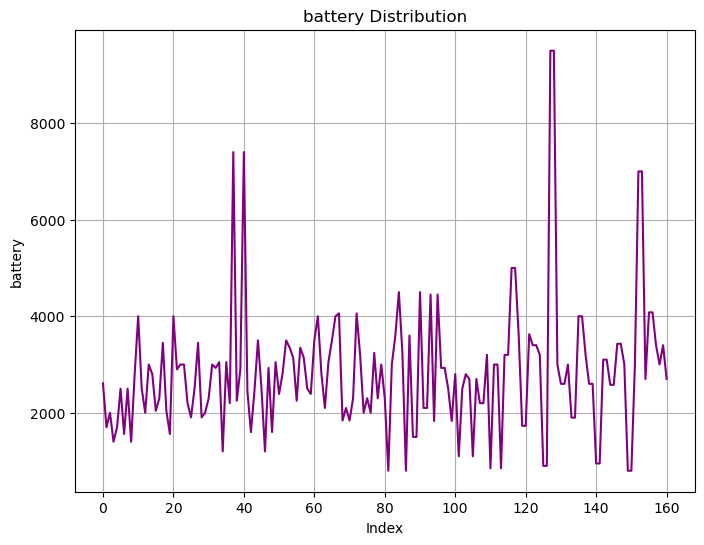

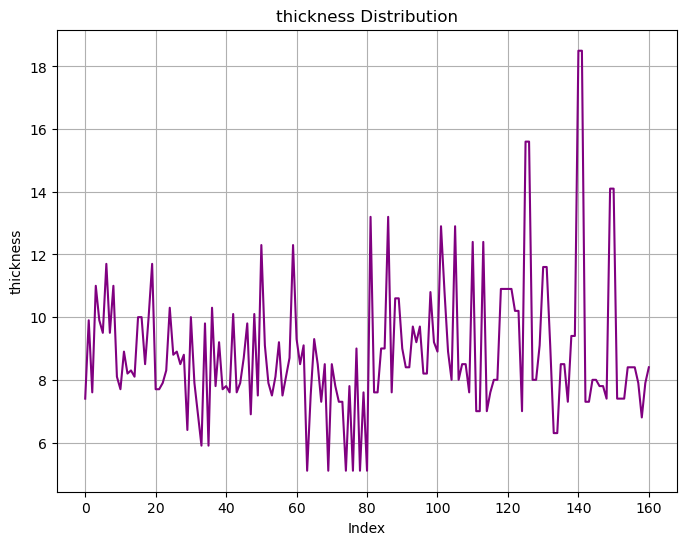

In [46]:
import matplotlib.pyplot as plt
import pandas as pd


# Loop through each column and plot a line plot
for column in mobile.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(mobile.index, mobile[column], color='purple')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'{column} Distribution')
    plt.grid(True)
    plt.show()


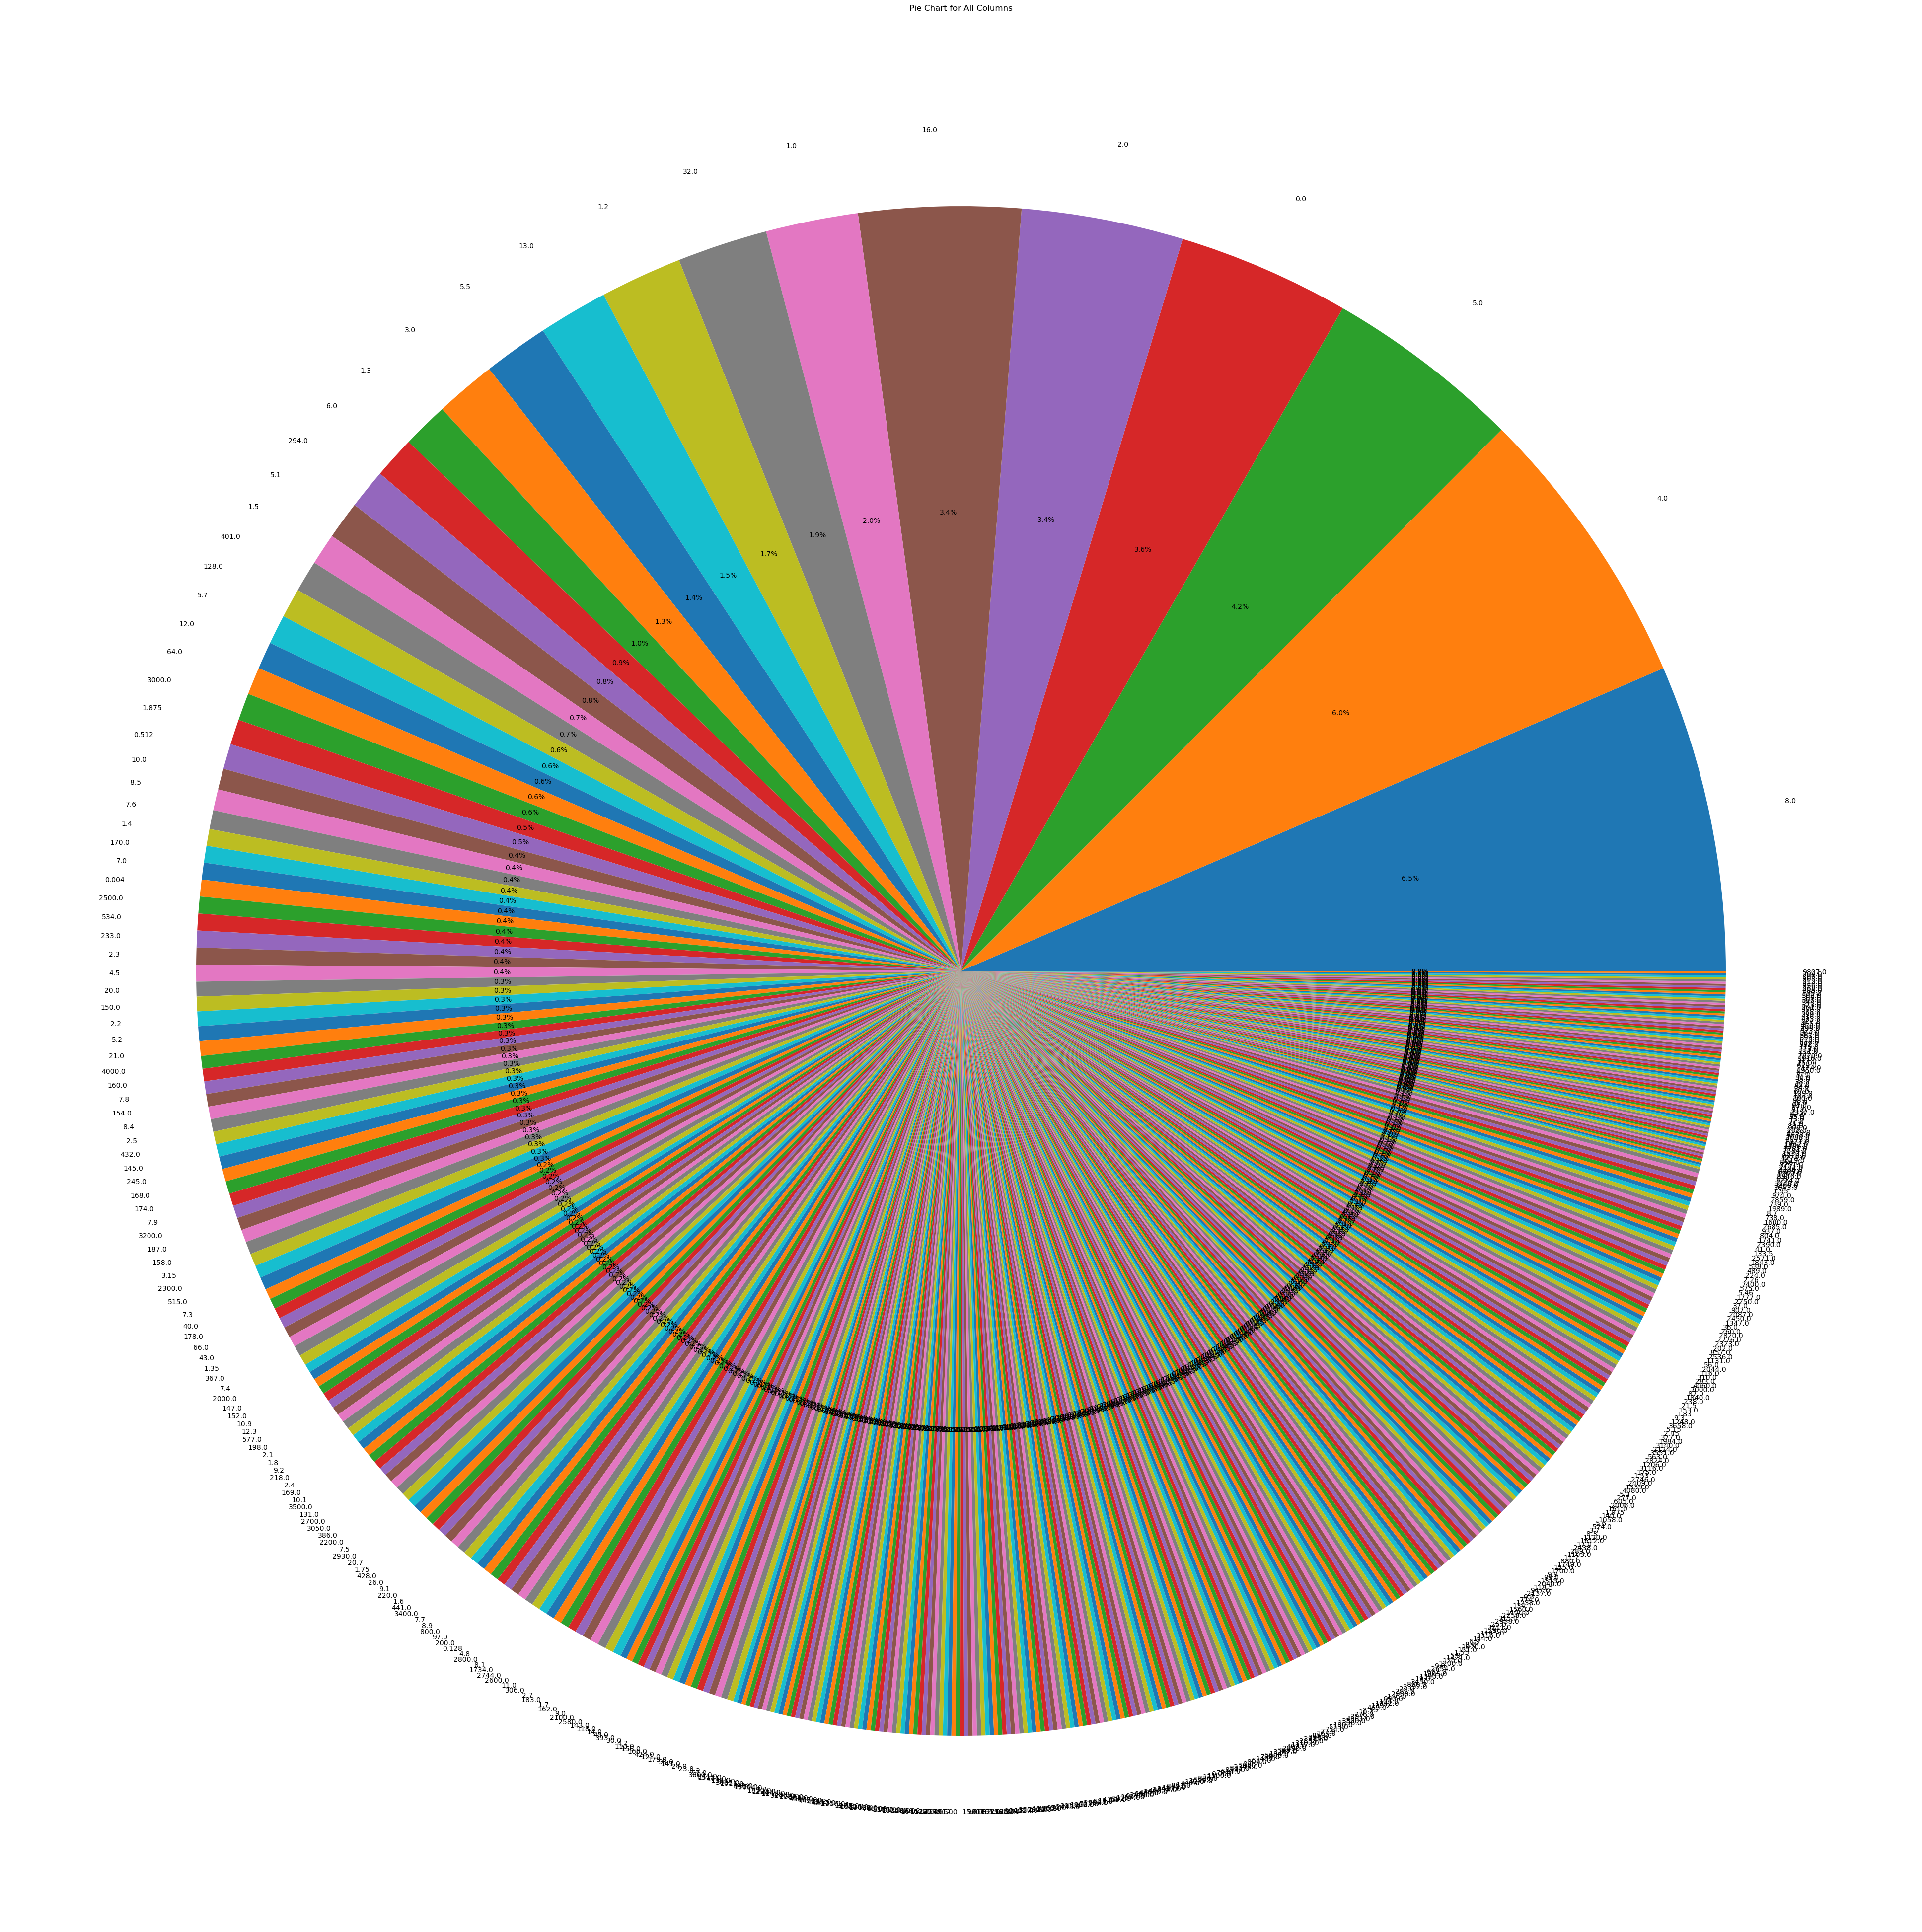

In [47]:
import matplotlib.pyplot as plt
import pandas as pd



# Pie chart for all columns
plt.figure(figsize=(50, 50))
all_values = mobile.values.flatten()
value_counts = pd.Series(all_values).value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for All Columns')
plt.show()


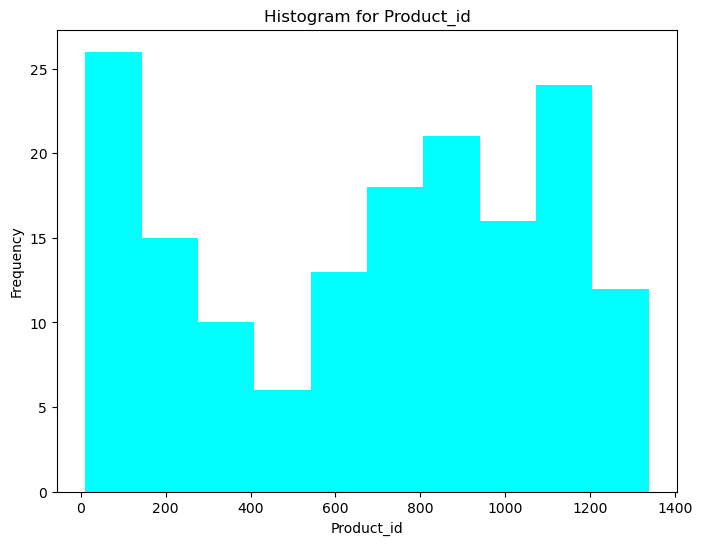

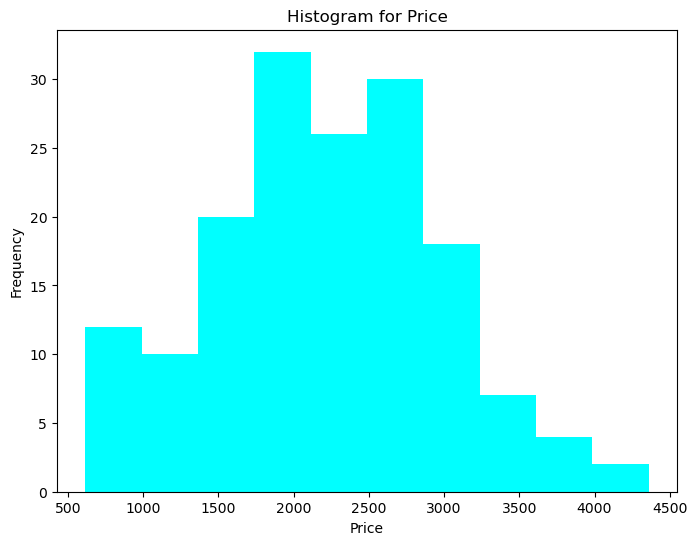

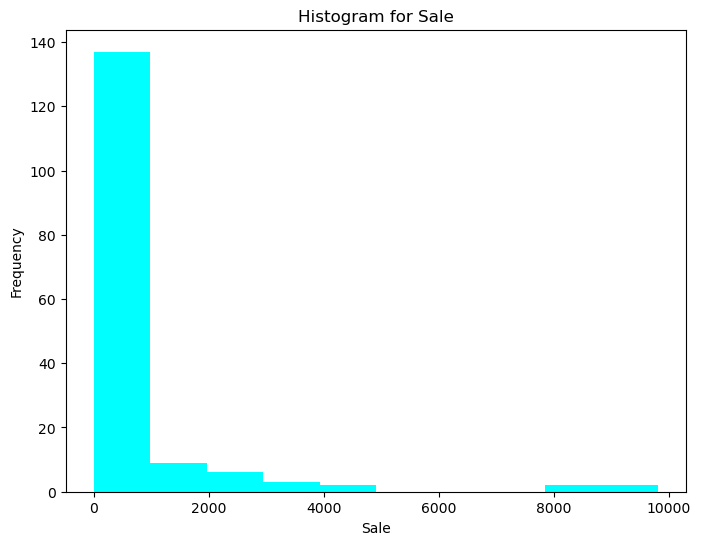

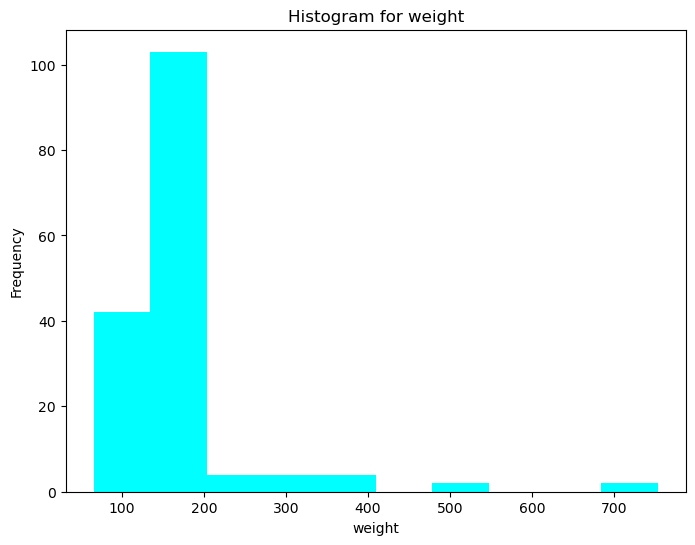

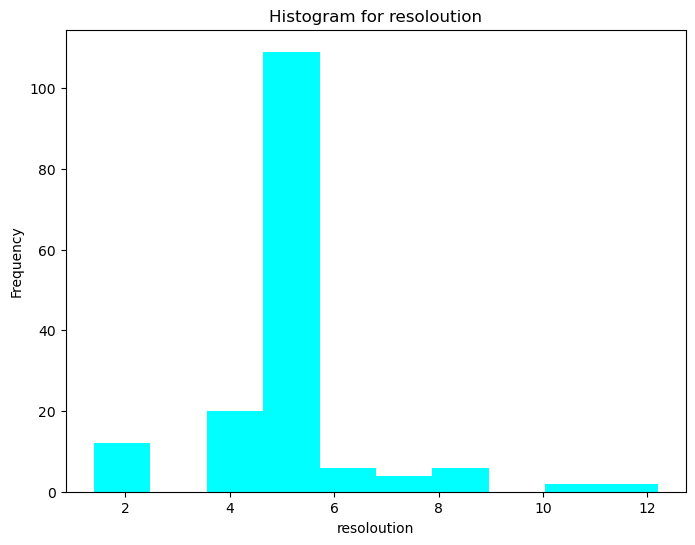

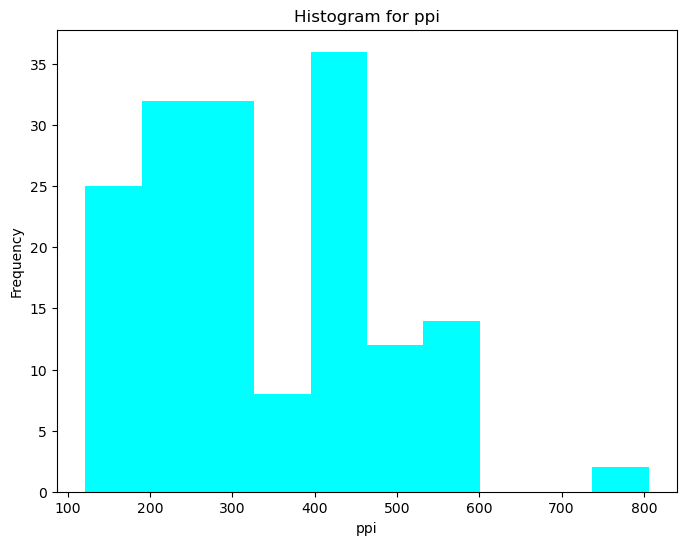

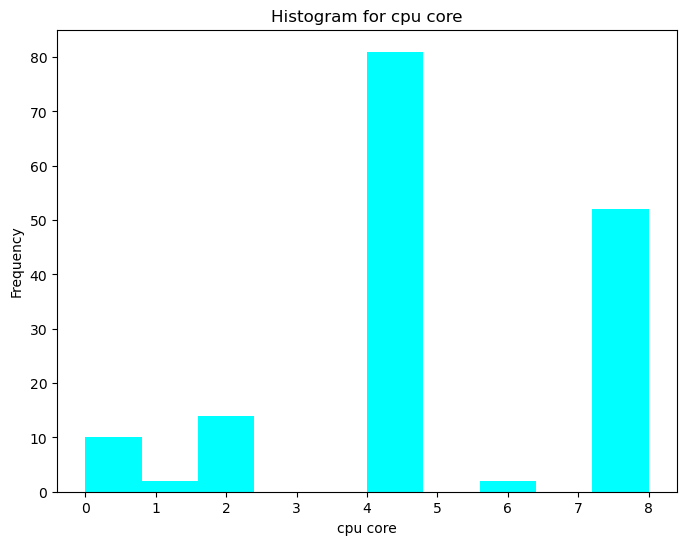

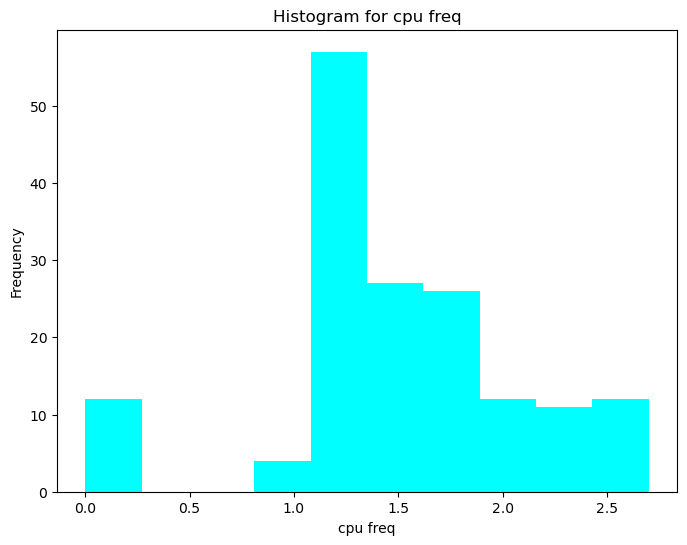

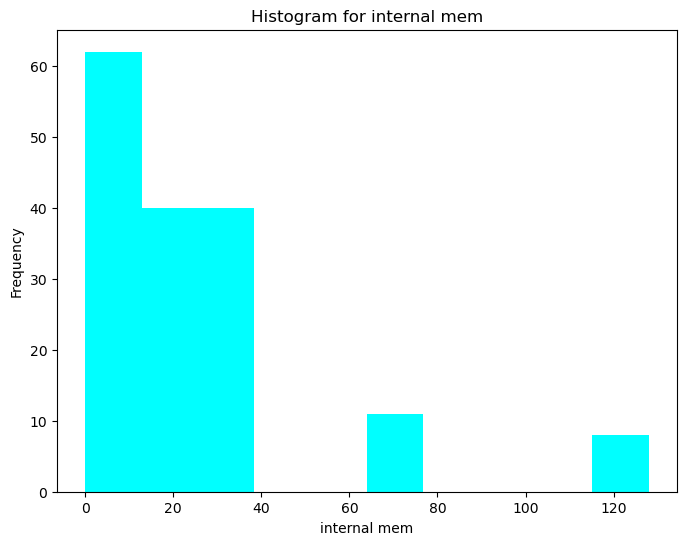

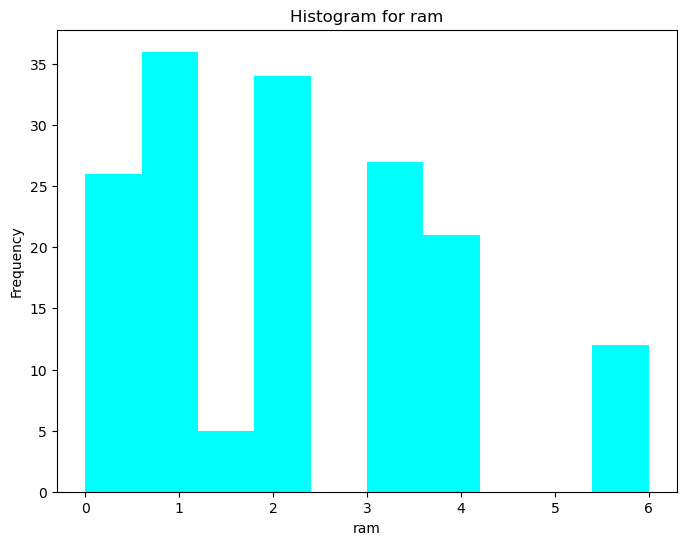

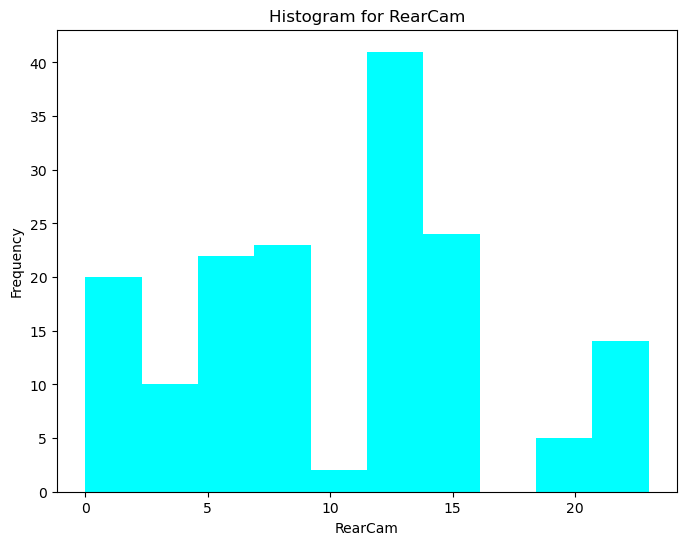

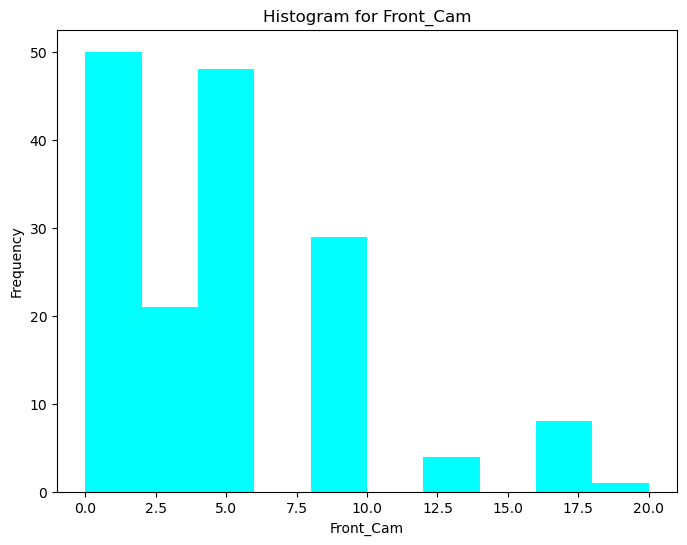

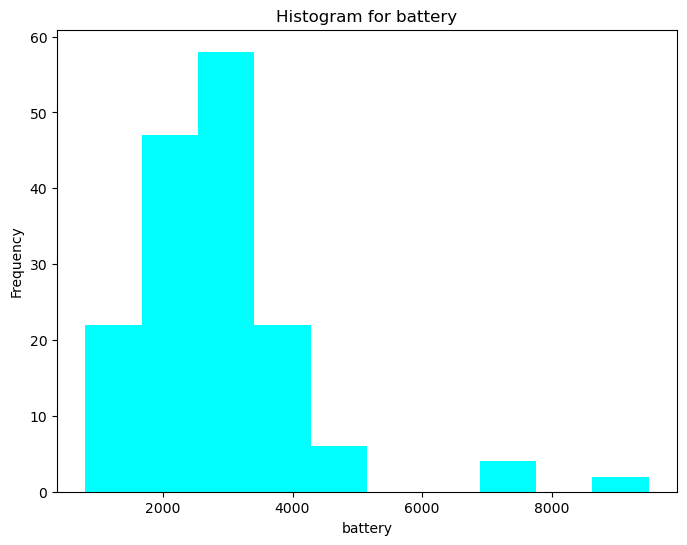

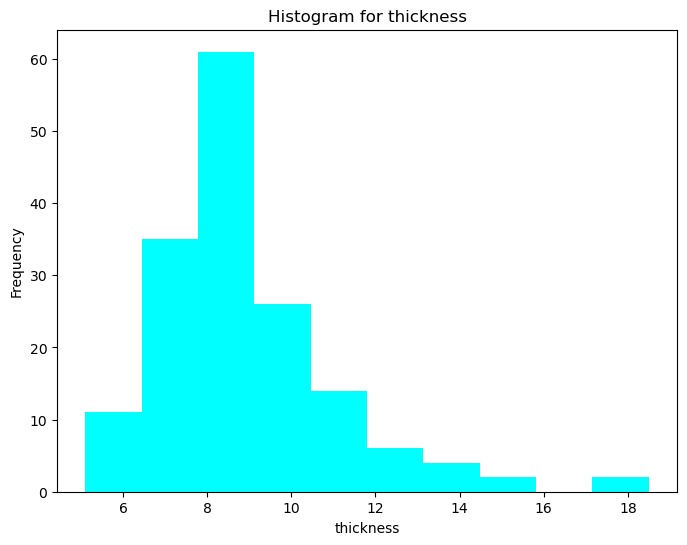

In [48]:
import matplotlib.pyplot as plt
import pandas as pd


# Histogram for each column
for column in mobile.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(mobile[column], bins=10, color='cyan')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.show()


Text(0.5, 1.0, 'weight and price')

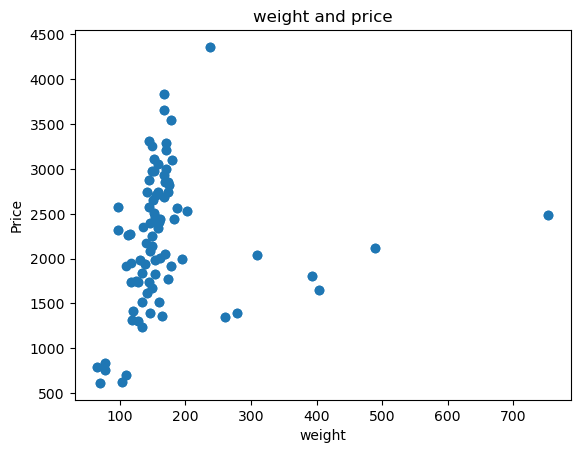

In [49]:
t = mobile['Price']#target
plt.scatter(mobile['weight'],t)
plt.xlabel('weight')
plt.ylabel('Price')
plt.title('weight and price')

Text(0.5, 1.0, 'resolution and price')

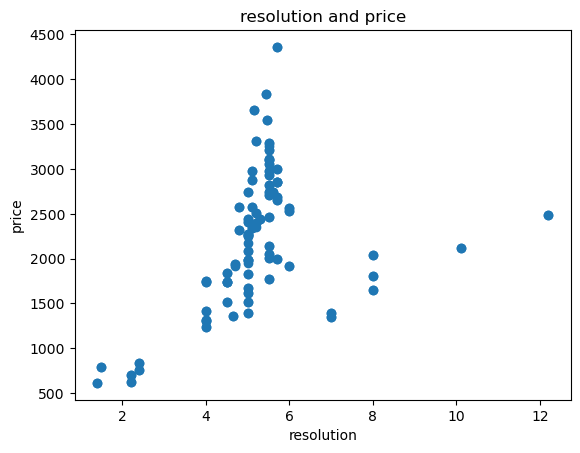

In [50]:
plt.scatter(mobile['resoloution'],t)
plt.xlabel('resolution')
plt.ylabel('price')
plt.title('resolution and price')

Text(0.5, 1.0, 'ppi and price')

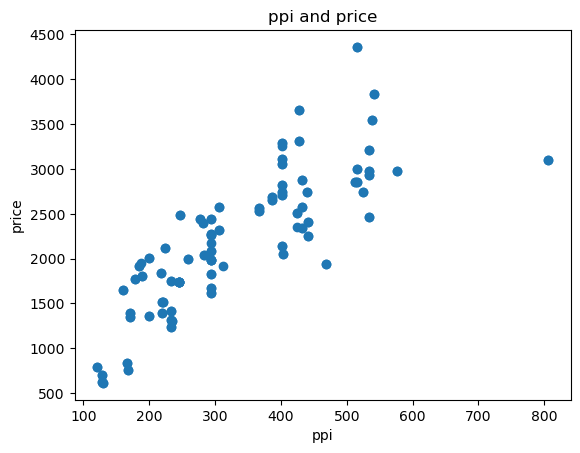

In [51]:
plt.scatter(mobile['ppi'],t)
plt.xlabel('ppi')
plt.ylabel('price')
plt.title('ppi and price')

Text(0.5, 1.0, 'battery and price')

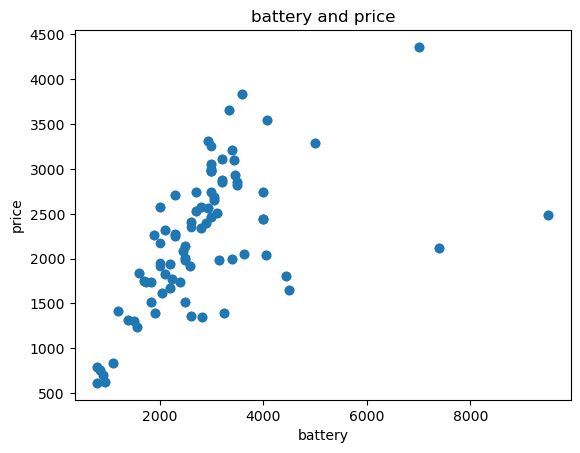

In [52]:
plt.scatter(mobile['battery'],t)
plt.xlabel('battery')
plt.ylabel('price')
plt.title('battery and price')

Text(0.5, 1.0, 'thickness and price')

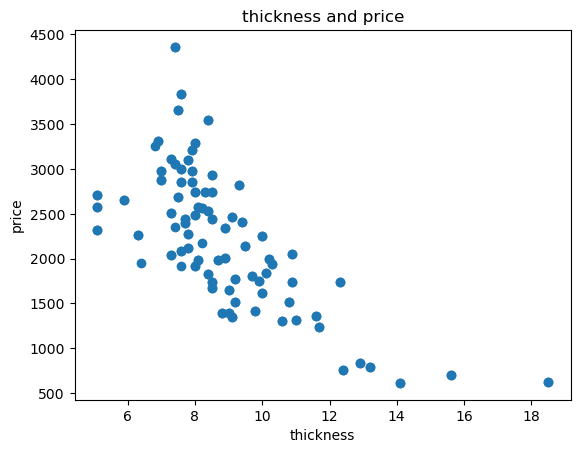

In [53]:
plt.scatter(mobile['thickness'],t)
plt.xlabel('thickness')
plt.ylabel('price')
plt.title('thickness and price')


Text(0.5, 1.0, 'front camera and price')

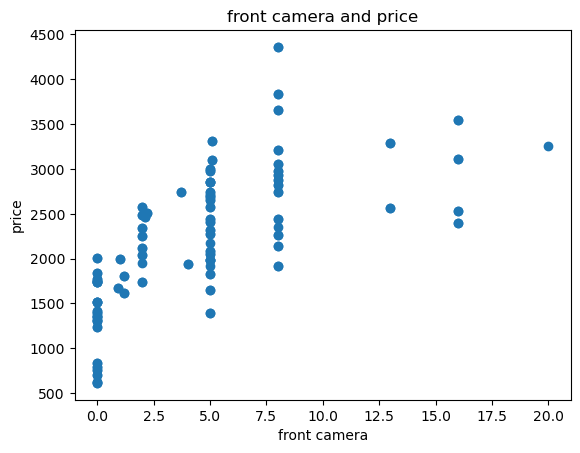

In [54]:
plt.scatter(mobile["Front_Cam"],t)
plt.xlabel('front camera')
plt.ylabel('price')
plt.title('front camera and price')

Text(0.5, 1.0, 'rear camera and price ')

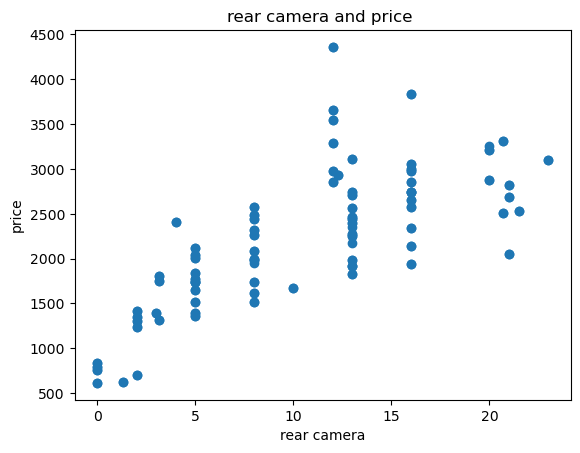

In [55]:
plt.scatter(mobile["RearCam"], t)
plt.xlabel('rear camera')
plt.ylabel('price')
plt.title('rear camera and price ')

Text(0.5, 1.0, 'RAM and price')

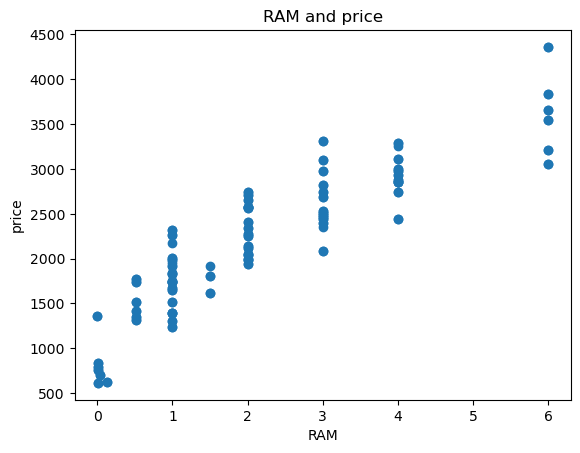

In [56]:
plt.scatter(mobile['ram'],t)
plt.xlabel('RAM')
plt.ylabel('price')
plt.title('RAM and price')

Text(0.5, 1.0, 'CPU CORE and price')

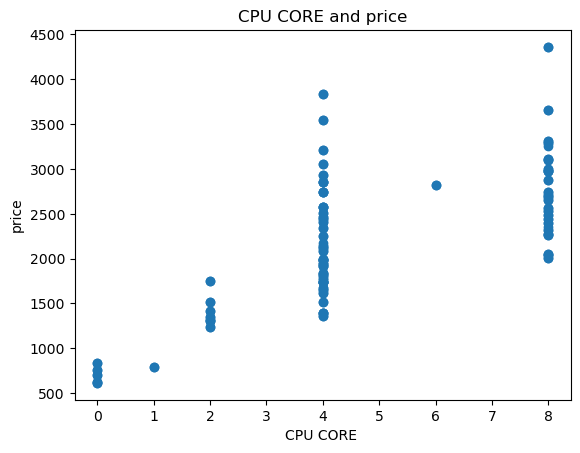

In [57]:
plt.scatter(mobile['cpu core'],t)
plt.xlabel('CPU CORE ')
plt.ylabel('price')
plt.title('CPU CORE and price')

Text(0.5, 1.0, 'CPU frequency and price')

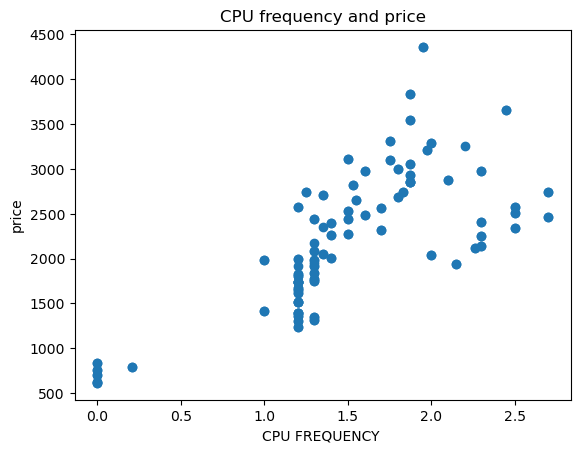

In [58]:
plt.scatter(mobile['cpu freq'],t)
plt.xlabel('CPU FREQUENCY ')
plt.ylabel('price')
plt.title('CPU frequency and price')

Text(0.5, 1.0, 'internal memory and price')

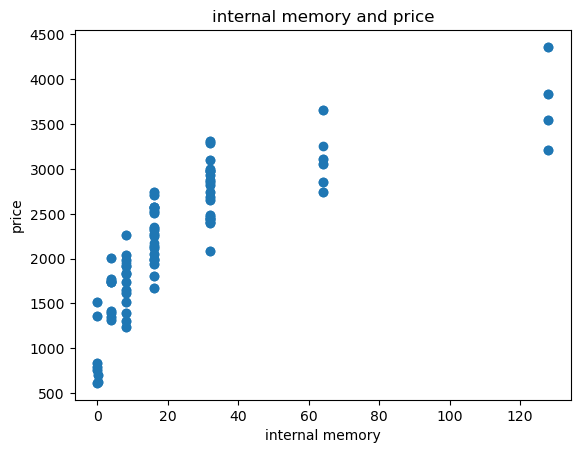

In [59]:
plt.scatter(mobile['internal mem'],t)
plt.xlabel('internal memory')
plt.ylabel('price')
plt.title('internal memory and price')

In [60]:
x=mobile.drop('Price',axis=1) #80% for train 20% for test 
y=mobile['Price']

In [61]:
print(x.shape)
print(y.shape)

(161, 13)
(161,)


In [62]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2)#train test split
print(xtr.shape)
print(xts.shape)
print(yts.shape)
print(ytr.shape)

(128, 13)
(33, 13)
(33,)
(128,)


In [63]:
model = LinearRegression()
model.fit(xtr,ytr)
y_predictions = model.predict(xts)

Coefficients: [ 2.36576664e-02 -2.41859343e-02 -7.57740146e-02 -1.09455671e+02
  8.94589100e-01  5.46007073e+01  1.41590653e+02  5.63836409e+00
  9.59542784e+01  6.33621148e+00  1.16971692e+01  1.34222364e-01
 -8.18025554e+01]
Intercept: 1910.657972998174
accuracy or r^2 score:  94.55


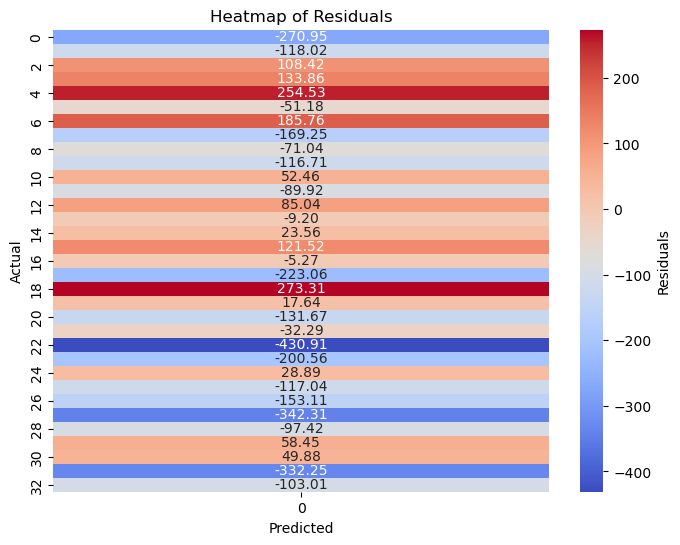

In [64]:
print('Coefficients:', model.coef_)#estimated coefficients or weight
print('Intercept:', model.intercept_)
accuracy =(r2_score(yts, y_predictions))
facc= round(accuracy*100,2)
print('accuracy or r^2 score: ' ,  facc)

#observed values of the target variables -  values predicted 
residuals = yts - y_predictions

plt.figure(figsize=(8, 6))
sns.heatmap(residuals.values.reshape(-1, 1), cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Residuals'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap of Residuals')
plt.show()

# CLASSIFICATION REPORT FOR A REGRESSION MODEL

In [65]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error

#how well the regression model explains the variability of target variable ; higher values are better 
d2_absolute_score = r2_score(yts, y_predictions)

# measures the proportion of variance should be higher
explained_variance = explained_variance_score(yts, y_predictions)

# represent the max residual should be lower 
max_err = max_error(yts, y_predictions)

# measures avg absoulte difference between predicted and true should be lower 
mae = mean_absolute_error(yts, y_predictions)

#measures the average of the squares of the errors should be lower 
mse = mean_squared_error(yts, y_predictions)

print("D2 Absolute Score:", d2_absolute_score*100)
print("Explained Variance Score:", explained_variance*100)
print("Max Error:", max_err*100)
print("Mean Absolute Error:", mae*100)
print("Mean Square Error:", mse*100)


D2 Absolute Score: 94.54908096975292
Explained Variance Score: 95.02984875118622
Max Error: 43091.30841929659
Mean Absolute Error: 13510.570608576882
Mean Square Error: 2910145.4614344193


In [66]:
# product_id = float(input("Enter Product ID: "))
# sale = float(input("Enter Sale: "))
# weight = float(input("Enter Weight: "))
# resolution = float(input("Enter Resolution: "))
# ppi = float(input("Enter PPI: "))
# cpu_core = float(input("Enter CPU Cores: "))
# cpu_freq = float(input("Enter CPU Frequency: "))
# internal_mem = float(input("Enter Internal Memory: "))
# ram = float(input("Enter RAM: "))
# rear_cam = float(input("Enter Rear Camera Resolution: "))
# front_cam = float(input("Enter Front Camera Resolution: "))
# battery = float(input("Enter Battery Capacity: "))
# thickness = float(input("Enter Thickness: "))

# user_input = {
#     'Product_id': [product_id],
#     'Sale': [sale],
#     'weight': [weight],
#     'resoloution': [resolution],
#     'ppi': [ppi],
#     'cpu core': [cpu_core],
#     'cpu freq': [cpu_freq],
#     'internal mem': [internal_mem],
#     'ram': [ram],
#     'RearCam': [rear_cam],
#     'Front_Cam': [front_cam],
#     'battery': [battery],
#     'thickness': [thickness]
# }

# user_df = pd.DataFrame(user_input)
# predicted_price = model.predict(user_df)
# print("Predicted Price:", predicted_price)


# plt.figure(figsize=(8, 6))
# plt.scatter(yts, y_predictions, color='blue', label='Actual vs. Predicted')
# plt.plot([yts.min(), yts.max()], [yts.min(), yts.max()], 'k--', lw=2, label='Ideal Line')
# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')
# plt.title('Actual Price vs. Predicted Price')
# plt.legend()
# plt.show()

C:\Users\Muhammad Hassan\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Battery Capacity
- CPU Cores
- CPU Frequency
- Front Camera Resolution
- Internal Memory
- ...
Feature names seen at fit time, yet now missing:
- Front_Cam
- RearCam
- battery
- cpu core
- cpu freq
- ...

  warnings.warn(message, FutureWarning)


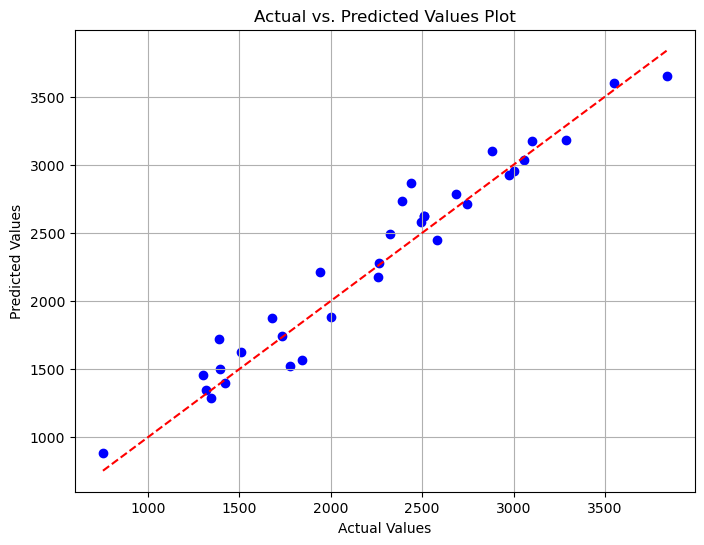

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
import os
import numpy as np
import tkinter as tk
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import messagebox

def predict_price():
    try:
        product_id = float(fields[0][1].get())
        sale = float(fields[1][1].get())
        weight = float(fields[2][1].get())
        resolution = float(fields[3][1].get())
        ppi = float(fields[4][1].get())
        cpu_core = float(fields[5][1].get())
        cpu_freq = float(fields[6][1].get())
        internal_mem = float(fields[7][1].get())
        ram = float(fields[8][1].get())
        rear_cam = float(fields[9][1].get())
        front_cam = float(fields[10][1].get())
        battery = float(fields[11][1].get())
        thickness = float(fields[12][1].get())
        user_input = {
            'Product_id': [product_id],
            'Sale': [sale],
            'Weight': [weight],
            'Resolution': [resolution],
            'PPI': [ppi],
            'CPU Cores': [cpu_core],
            'CPU Frequency': [cpu_freq],
            'Internal Memory': [internal_mem],
            'RAM': [ram],
            'Rear Camera Resolution': [rear_cam],
            'Front Camera Resolution': [front_cam],
            'Battery Capacity': [battery],
            'Thickness': [thickness]
        }
        
        user_df = pd.DataFrame(user_input)
        predicted_price = model.predict(user_df)
        predicted_price_label.config(text=f"Predicted Price: {predicted_price[0]:.2f}")
        
        plt.figure(figsize=(8, 6))
        plt.scatter(yts, y_predictions, color='blue')
        plt.plot([yts.min(), yts.max()], [yts.min(), yts.max()], color='red', linestyle='--')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values Plot')
        plt.grid(True)
        plt.show()
        plt.legend()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=root)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for all features.")

def focus_next_entry(event):
    event.widget.tk_focusNext().focus()
    return "break"
# mobile = pd.read_excel(r"C:\Users\rahim\OneDrive\Desktop\Cellphone.xlsx")
# x = mobile.drop('Price', axis=1)
# y = mobile['Price']
# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.2)
# model = LinearRegression()
# model.fit(xtr, ytr)
# y_predictions = model.predict(xts)

root = tk.Tk()
root.title("Mobile Price Prediction using Linear Regression")
root.geometry("1500x700")  
root.configure(bg="LightBlue2")
heading_label = tk.Label(root, text="MOBILE PRICE PREDICTOR USING LINEAR REGRESSION", font=("Arial", 20, "bold italic underline"), bg="LightBlue2")
heading_label.pack(pady=10)

accur = tk.Label(root, text=f'Accuracy: {facc}', font=('Arial', 14 ,"bold"), bg='LightBlue2')
accur.pack(pady=10)

input_frame = tk.Frame(root, bg="LightBlue2")
input_frame.pack(pady=10)
font_style = ("Arial", 12)

fields = [
    ("Product ID:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Sale:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Weight:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Resolution:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("PPI:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("CPU Cores:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("CPU Frequency:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Internal Memory:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("RAM:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Rear Camera Resolution:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Front Camera Resolution:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Battery Capacity:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue")),
    ("Thickness:", tk.Entry(input_frame, font=font_style,highlightthickness=1,highlightbackground="midnightblue",bg="light blue"))
]

for i, (label_text, entry) in enumerate(fields):
    tk.Label(input_frame, text=label_text, bg="LightBlue2", font=font_style).grid(row=i, column=0, sticky="e", padx=5, pady=5)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entry.bind("<Return>", focus_next_entry)

predict_button = tk.Button(root, text="Predict Price",bg="midnightblue",fg='white', command=predict_price, font=font_style)
predict_button.pack(pady=20)

predicted_price_label = tk.Label(root, text="", bg="midnightblue",fg='white', font=font_style)
predicted_price_label.pack()

root.mainloop()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(yts, y_predictions, color='blue')
plt.plot([yts.min(), yts.max()], [yts.min(), yts.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Plot')
plt.grid(True)
plt.show()

In [ ]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
coefficients = model.coef_
feature_names = x.columns
sns.barplot(x=coefficients, y=feature_names, color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
